In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np 
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Neural networks imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import classification_report



In [2]:
# Load the dotenv file
load_dotenv()

True

In [3]:
# Spotify API credentials
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
# Read in the data
data = pd.read_csv('../Data/song_data(pop-artist).csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,id,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,92,0,2017-09-03,0.615,0.779,2,-6.454,1,0.06650,0.000000,0.1550,0.453,160.000,208198,4
1,1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,74,63,2017-09-08,0.687,0.845,7,-4.370,1,0.10000,0.000000,0.0452,0.809,87.972,190227,4
2,2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,87,78,2016-11-17,0.818,0.803,1,-4.282,1,0.03400,0.000000,0.1530,0.632,106.970,225983,4
3,3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,91,77,2017-03-03,0.624,0.876,9,-3.374,1,0.07350,0.000000,0.3270,0.781,99.943,170827,4
4,4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,91,83,2014-06-21,0.614,0.379,4,-10.480,1,0.60700,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,9918,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,82,0,1973-10-05,0.410,0.761,9,-8.507,0,0.01980,0.084700,0.2470,0.193,138.712,666572,4
9919,9919,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,67,52,1977-01-01,0.406,0.306,3,-10.482,1,0.31300,0.007900,0.0727,0.073,135.272,652560,4
9920,9920,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,59,45,1971-11-26,0.362,0.507,1,-11.229,1,0.01740,0.216000,0.1130,0.456,146.641,634440,3
9921,9921,6Ff77WXC58MkhLE5A1qgY1,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,69,0,1976-12-10,0.331,0.733,2,-8.671,1,0.08870,0.001740,0.9470,0.380,128.512,620747,4


In [5]:
# Drop the songs with 0 popularity
df.drop(df[df['popularity_song'] == 0].index, inplace=True)

In [6]:
# Changing duration to minutes instead of milliseconds
# df['duration_m'] = df['duration_ms']/60000
# df = data.reindex(sorted(df.columns), axis=1)
# df.head()

## What does this tell us about the songs?

Going back to our hypothesis, predicting a hit song based on certain features. The above visualization highlight the the most relevant features based on popularity of the songs.
Stand out features are:
* Energy
* Danceability
* Loudness
* Acousticness
* Valence

In [7]:
# Drop Unecessary columns
df_nn = df.drop(['Unnamed: 0','id'], axis = 1)
df_nn.head()

,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Life Changes,Thomas Rhett,74,63,2017-09-08,0.687,0.845,7,-4.370,1,0.1000,0.000000,0.0452,0.809,87.972,190227,4
2,24K Magic,Bruno Mars,87,78,2016-11-17,0.818,0.803,1,-4.282,1,0.0340,0.000000,0.1530,0.632,106.970,225983,4
3,Galway Girl,Ed Sheeran,91,77,2017-03-03,0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,4
4,Photograph,Ed Sheeran,91,83,2014-06-21,0.614,0.379,4,-10.480,1,0.6070,0.000464,0.0986,0.201,107.989,258987,4
5,Havana (feat. Young Thug),Young Thug,83,1,2017-08-03,0.768,0.517,7,-4.323,0,0.1860,0.000038,0.1040,0.418,104.992,216897,4


In [8]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", 
            "mode", "loudness", "tempo", "valence", 'popularity_artist']
features

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'mode',
 'loudness',
 'tempo',
 'valence',
 'popularity_artist']

In [9]:
df_nn.describe()

,popularity_artist,popularity_song,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6.600000e+03,6600.000000
mean,63.080152,48.516364,0.571883,0.666534,5.246818,-7.366078,0.664697,0.219285,0.083560,0.186554,0.484610,120.547484,2.804095e+05,3.942879
std,17.238109,19.613890,0.165417,0.219595,3.573931,4.322217,0.472132,0.276974,0.228501,0.155939,0.246824,28.266113,3.689502e+05,0.348065
min,0.000000,1.000000,0.000000,0.000000,0.000000,-44.907000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001720e+05,0.000000
25%,55.000000,37.000000,0.469000,0.536000,2.000000,-8.584250,0.000000,0.013400,0.000000,0.093600,0.289000,99.928750,1.975422e+05,4.000000
50%,66.000000,51.000000,0.585000,0.712000,5.000000,-6.239000,1.000000,0.083900,0.000014,0.123000,0.481000,119.974000,2.238800e+05,4.000000
75%,75.000000,64.000000,0.689000,0.838000,9.000000,-4.744000,1.000000,0.334250,0.003775,0.229000,0.677000,138.179500,2.594130e+05,4.000000
max,100.000000,88.000000,0.980000,1.000000,11.000000,-0.716000,1.000000,0.995000,0.999000,0.981000,0.981000,214.419000,6.000295e+06,5.000000


In [10]:
# Assign 1 to all songs with a popularity of > 57 and 0 to all songs with a popularity of <= 57
df_nn['popularity_song'] = df_nn['popularity_song'].apply(lambda x: 1 if x > 57 else 0)



In [11]:
# Count the number of songs with popularity of 0
df_nn.loc[df_nn['popularity_song'] == 0, 'popularity_song'].count()

4108

In [12]:
# Count the number of songs with popularity of 1
df_nn.loc[df_nn['popularity_song'] == 1, 'popularity_song'].count()

2492

In [13]:
df_nn.describe()

,popularity_artist,popularity_song,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6.600000e+03,6600.000000
mean,63.080152,0.377576,0.571883,0.666534,5.246818,-7.366078,0.664697,0.219285,0.083560,0.186554,0.484610,120.547484,2.804095e+05,3.942879
std,17.238109,0.484817,0.165417,0.219595,3.573931,4.322217,0.472132,0.276974,0.228501,0.155939,0.246824,28.266113,3.689502e+05,0.348065
min,0.000000,0.000000,0.000000,0.000000,0.000000,-44.907000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001720e+05,0.000000
25%,55.000000,0.000000,0.469000,0.536000,2.000000,-8.584250,0.000000,0.013400,0.000000,0.093600,0.289000,99.928750,1.975422e+05,4.000000
50%,66.000000,0.000000,0.585000,0.712000,5.000000,-6.239000,1.000000,0.083900,0.000014,0.123000,0.481000,119.974000,2.238800e+05,4.000000
75%,75.000000,1.000000,0.689000,0.838000,9.000000,-4.744000,1.000000,0.334250,0.003775,0.229000,0.677000,138.179500,2.594130e+05,4.000000
max,100.000000,1.000000,0.980000,1.000000,11.000000,-0.716000,1.000000,0.995000,0.999000,0.981000,0.981000,214.419000,6.000295e+06,5.000000


# Data Preprocessing

In [14]:
# Creating the X and y sets
X = df_nn[features]
y = df_nn['popularity_song']

In [15]:
# Creating training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10)

In [16]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [17]:
# Scale the data
scaler = StandardScaler().fit(X_val)
X_val = scaler.transform(X_val)

# Build Deep Learning Model

In [18]:
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 200


print(number_input_features, hidden_nodes_layer1, hidden_nodes_layer2)

10 200 200


In [19]:
# Define the neural network model
model = Sequential()

# Layer 1
model.add(
    Dense(units=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer1, activation="relu"))

# Layer 3 
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
model.add(Dense(1 , activation="softmax"))

2022-06-07 18:57:30.543105: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [21]:
# Training the model
batch_size = 32
epochs = 1000
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/1000
116/116 [==============================] - 3s 9ms/step - loss: 0.5928 - accuracy: 0.3669 - tp: 1362.0000 - tn: 0.0000e+00 - fp: 2350.0000 - fn: 0.0000e+00 - precision: 0.3669 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.5651 - val_accuracy: 0.3780 - val_tp: 468.0000 - val_tn: 0.0000e+00 - val_fp: 770.0000 - val_fn: 0.0000e+00 - val_precision: 0.3780 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/1000
116/116 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.3669 - tp: 1362.0000 - tn: 0.0000e+00 - fp: 2350.0000 - fn: 0.0000e+00 - precision: 0.3669 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.5437 - val_accuracy: 0.3780 - val_tp: 468.0000 - val_tn: 0.0000e+00 - val_fp: 770.0000 - val_fn: 0.0000e+00 - val_precision: 0.3780 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.3669 - tp: 1362.0000 - tn: 0.0000e+00 - fp: 2350.0000 - fn: 0.0000e+00 - precision: 0.3669 - re

In [22]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 42,711
Trainable params: 42,711
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:title={'center':'Loss'}, xlabel='Epoch'>

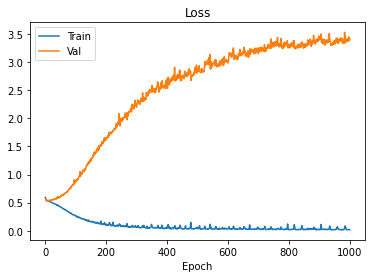

In [23]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<AxesSubplot:title={'center':'Accuracy'}, xlabel='Epoch'>

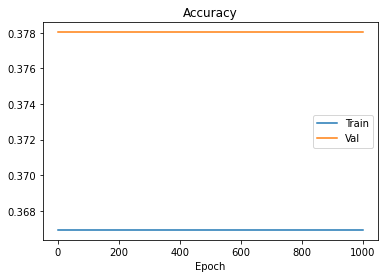

In [24]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<AxesSubplot:title={'center':'AUC'}, xlabel='Epoch'>

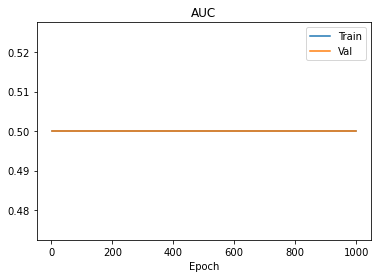

In [25]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [26]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 381.3171691894531,
 'accuracy': 0.4012121260166168,
 'tp': 662.0,
 'tn': 0.0,
 'fp': 988.0,
 'fn': 0.0,
 'precision': 0.4012121260166168,
 'recall': 1.0,
 'auc': 0.5}

In [27]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=662.0,FN=988.0
Negative(0),FP=0.0,TN=0.0


In [45]:
# Import the classification_report method from sklearn

# Predict classes using testing data
y_predict_classes = (model.predict(X_test) > 0.5).astype("int32")

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57      1650

    accuracy                           0.40      1650
   macro avg       0.50      0.20      0.29      1650
weighted avg       1.00      0.40      0.57      1650



/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [42]:
# put metrics into a dataframe
metrics_df = pd.DataFrame(metrics, index=["Values"]).T
# Transpose metrics_df
metrics_df

,Values
loss,381.317169
accuracy,0.401212
tp,662.000000
tn,0.000000
fp,988.000000
fn,0.000000
precision,0.401212
recall,1.000000
auc,0.500000


In [32]:
accuracy_df


,Train,Val
Epoch,,
1,0.366918,0.378029
2,0.366918,0.378029
3,0.366918,0.378029
4,0.366918,0.378029
5,0.366918,0.378029
...,...,...
996,0.366918,0.378029
997,0.366918,0.378029
998,0.366918,0.378029


In [33]:
loss_df

,Train,Val
Epoch,,
1,0.592805,0.565133
2,0.567041,0.543674
3,0.555637,0.537165
4,0.547686,0.530270
5,0.544322,0.526806
...,...,...
996,0.019636,3.433264
997,0.022154,3.451382
998,0.020044,3.382841


In [29]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[972  16]
 [640  22]]


              precision    recall  f1-score   support

           0       0.60      0.98      0.75       988
           1       0.58      0.03      0.06       662

    accuracy                           0.60      1650
   macro avg       0.59      0.51      0.41      1650
weighted avg       0.59      0.60      0.47      1650



/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.

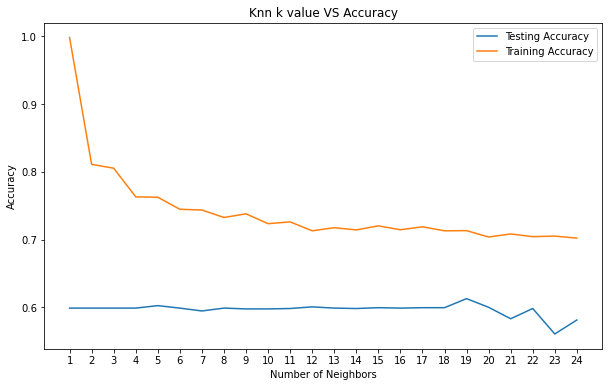

Best accuracy is 0.6127272727272727 with K = 19


In [31]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))